<a href="https://colab.research.google.com/github/Feny-rs/sprouts_model/blob/master/Inception_v3_imageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CLAcDuqXX6buLaKIgh29")
project = rf.workspace("politeknik-negeri-semarang-nurcn").project("yolo-sprouts-classification")
dataset = project.version(4).download("multiclass")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Yolo-Sprouts-Classification-4 in multiclass:: 100%|██████████| 1282/1282 [00:00<00:00, 4240.73it/s]


loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'time': 0.2358498349999536, 'image': {'width': 640, 'height': 640}, 'predictions': {'abnormal': {'confidence': 0.09378319978713989}, 'mati': {'confidence': 0.11963412165641785}, 'normal': {'confidence': 0.8766178488731384}, 'normal pembusukan': {'confidence': 0.14341312646865845}}, 'predicted_classes': ['normal'], 'image_path': '/content/Yolo-Sprouts-Classification-4/valid/DSC_0243_JPG.rf.3e795c4a0db1c269ba6b210f405de1dc.jpg', 'prediction_type': 'ClassificationModel'}], 'image': (640, 640)}


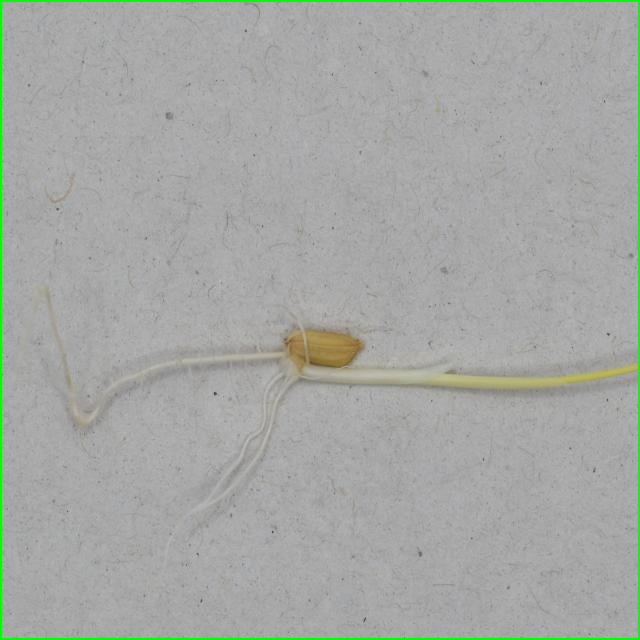

Class: normal, Confidence: 87.66%


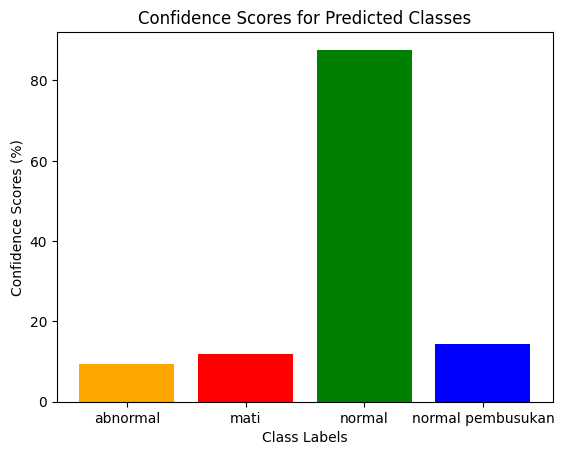

In [14]:
import cv2
from roboflow import Roboflow
from IPython.display import Image, display
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

rf = Roboflow(api_key="CLAcDuqXX6buLaKIgh29")
project = rf.workspace("politeknik-negeri-semarang-nurcn").project("yolo-sprouts-classification")
model = project.version("4").model

image_path = "/content/Yolo-Sprouts-Classification-4/valid/DSC_0243_JPG.rf.3e795c4a0db1c269ba6b210f405de1dc.jpg"

# infer on a local image
print(model.predict(image_path).json())
prediction = model.predict(image_path).json()

# visualize your prediction
# Extract prediction information
predictions = prediction['predictions'][0]['predictions']
class_label = max(predictions, key=lambda k: predictions[k]['confidence'])
probability = predictions[class_label]['confidence']

# Function to get color based on class
def get_color(class_label):
    class_colors = {
        "abnormal": (0, 165, 255),  # Orange (BGR format)
        "mati": (0, 0, 255),       # Red (BGR format)
        "normal": (0, 255, 0),     # Green (BGR format)
        "normal pembusukan": (255, 0, 0),  # Blue (BGR format)
    }
    return class_colors.get(class_label, (128, 128, 128))  # Default to gray if not found

#  Load your image
image = cv2.imread(image_path)
stroke_color = get_color(class_label)  # Get the color based on the class_label
stroke_thickness = 2
height, width, _ = image.shape
cv2.rectangle(image, (0, 0), (width - 1, height - 1), stroke_color, stroke_thickness)
cv2.imwrite("image_with_stroke.jpg", image)
# Load the image with the stroke
display(Image(filename='image_with_stroke.jpg'))

# Initialize an empty list to store the text representation
text_prediction = []

# Iterate through the predictions
for pred in prediction['predictions']:
    # Get the class label
    class_label = max(pred['predictions'], key=lambda k: pred['predictions'][k]['confidence'])
    confidence = pred['predictions'][class_label]['confidence']

    # Convert confidence to a percentage
    confidence_percent = confidence * 100

    # Format the prediction into a human-readable text with confidence as a percentage
    text = f"Class: {class_label}, Confidence: {confidence_percent:.2f}%"

    # Append the text to the list
    text_prediction.append(text)

# Join the text predictions into a single string
result_text = '\n'.join(text_prediction)

# Print or use the result_text as needed
print(result_text)


# Extract the confidence scores
confidences = prediction['predictions'][0]['predictions']
class_labels = list(confidences.keys())
confidence_values = [confidences[label]['confidence'] * 100 for label in class_labels]  # Convert to percentages

# Create a bar chart
plt.bar(class_labels, confidence_values, color=['orange', 'red', 'green', 'blue'])

# Add labels and title
plt.xlabel('Class Labels')
plt.ylabel('Confidence Scores (%)')  # Update the ylabel to include %
plt.title('Confidence Scores for Predicted Classes')

# Show the plot
plt.show()

In [15]:
# Load your dataset
dataset = pd.read_csv('/content/Yolo-Sprouts-Classification-4/valid/_classes.csv')  # Replace with the path to your dataset CSV file

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation images and make predictions
for filename in os.listdir(valid_images_path):
    if filename.endswith(".jpg"):
        # Load the image
        image_path = os.path.join(valid_images_path, filename)

        # Use your Roboflow model to make predictions
        prediction = model.predict(image_path).json()

        # Extract the true class label from the dataset
        true_class_label = None
        for class_column in class_labels:
            if dataset.loc[dataset['filename'] == filename][f' {class_column}'].values[0] == 1:
                true_class_label = class_column
                break

        # Extract predicted labels from the model's output
        predictions = prediction['predictions'][0]['predictions']
        predicted_class_label = max(predictions, key=lambda k: predictions[k]['confidence'])

        # Append true and predicted labels to their respective lists
        true_labels.append(true_class_label)
        predicted_labels.append(predicted_class_label)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='macro')
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='macro')
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='macro')
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.76
Precision: 0.74
Recall: 0.74
F1 Score: 0.70
